# Case Study: Artisanal Mining Sites in Congo

In this notebook, a case study is analyzed: artisanal mining sites in Congo. The data set is from [IPIS: International Peace Service](https://ipisresearch.be). It contains information about the mines: location, minerals being mined, social insecurity situation. More information: [IPIS Open Data Tutorial](https://ipisresearch.be/wp-content/uploads/2018/03/Open_Data_Tutorial.html).

Links to explore the dataset source repositories:

- [IPIS Open Data](https://ipisresearch.be/home/maps-data/open-data/)
- [World Resources Institute](https://www.wri.org/)

Look at the companion guide: [`README.md`](../README.md).

Table of contents:


## 4. Case Study: Artisanal Mining Sites

### 4.1 File Formats

There are many file formats supported by Geopandas, with pros/cons:

- ESRI Shapefiles: most extended, but distributed in several files, all necessary: `.shp`, `.dbf`, `shx`, `.prj`.
- `GeoJSON`: lightweight, often used in web applications. 
- GeoPackage: `.gpkg`, new, with more capabilities
- ...
- Geopandas can also read from geo-databases, like [PostGIS](https://postgis.net/), a spatial databse extender for PostgreSQL.

Geopandas can read and write those files: `.to_file()`:

```python
# Writing a Shapefile file
geodataframe.to_file("mydata.shp", driver='ESRI Shapefile')

# Writing a GeoJSON file
geodataframe.to_file("mydata.geojson", driver='GeoJSON')

# Writing a GeoPackage file
geodataframe.to_file("mydata.gpkg", driver='GPKG')
```

### 4.2 Explore the Dataset

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = "../../data/work_geodata/Mines/"

In [4]:
# Read the mining site data
mining_sites = gpd.read_file(DATA_PATH+"ipis_cod_mines.geojson")

In [10]:
# Print the first rows and the CRS information
mining_sites.head()

,visit_date,name,n_workers,mineral,geometry
0,2013-03-27,Mayi-Tatu,150.0,Gold,POINT (29.66033 1.01089)
1,2013-03-27,Mabanga,115.0,Gold,POINT (29.65862 1.00308)
2,2013-03-27,Molende,130.0,Gold,POINT (29.65629 0.98563)
3,2013-03-27,Embouchure,135.0,Gold,POINT (29.64494 0.99976)
4,2013-03-27,Apumu-Atandele-Jerusalem-Luka Yayo,270.0,Gold,POINT (29.66000 0.95600)


In [11]:
mining_sites.shape

(2143, 5)

In [6]:
print(mining_sites.crs)

epsg:4326


<AxesSubplot:>

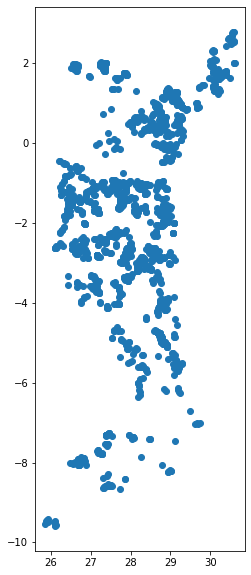

In [9]:
# Make a quick visualisation
mining_sites.plot(figsize=(10,10))

In [12]:
# Read the Congo protected areas data
protected_areas = gpd.read_file(DATA_PATH+"wdpamay2017cod-shapefile-polygons.geojson")

/Users/mxagar/opt/anaconda3/envs/ds/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

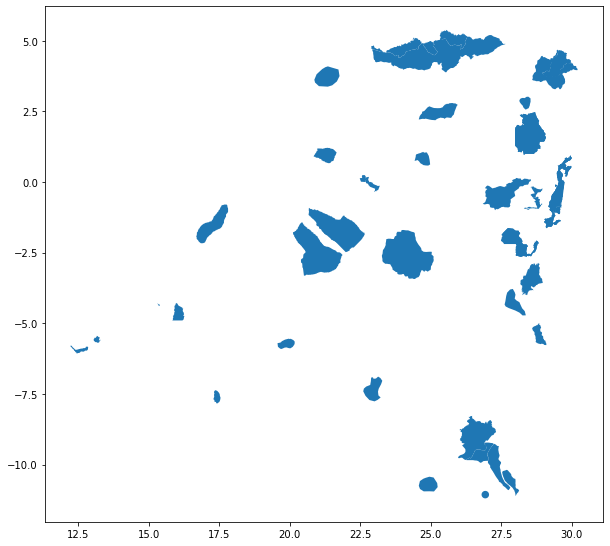

In [13]:
# Make a quick visualisation
protected_areas.plot(figsize=(10,10))

In [14]:
# Convert both datasets to UTM projection
mining_sites_utm = mining_sites.to_crs(epsg=32735)
protected_areas_utm = protected_areas.to_crs(epsg=32735)

/Users/mxagar/opt/anaconda3/envs/ds/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


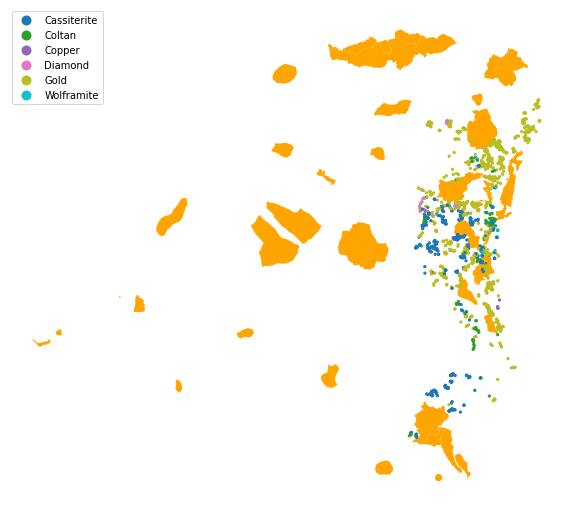

In [23]:
# Visualize both datasets
ax = protected_areas_utm.plot(color='orange',
                              figsize=(10,10))
mining_sites_utm.plot(ax=ax,
                      markersize=5,
                      column='mineral',
                      # lpha=0.5,
                      legend=True,
                      legend_kwds={'loc':'upper left'})
ax.set_axis_off()
plt.show()

In [21]:
# Write converted data to a file
# Warning: With SHP, several files created - all necessary!
mining_sites_utm.to_file(DATA_PATH+"ipis_cod_mines_utm.gpkg", driver='GPKG')
protected_areas_utm.to_file(DATA_PATH+"cod_conservation_utm.shp", driver='ESRI Shapefile')